In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context(context='notebook')
sns.set_style("whitegrid")
import pickle
import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, fbeta_score

import matplotlib.pyplot as plt

df = pd.read_csv('data/Cardiovascular_Diseases_Risk_Prediction_Dataset.csv')
y = df['Heart_Disease']
X = df.drop('Heart_Disease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=12, stratify= y)

## Viz 1: Imbalance

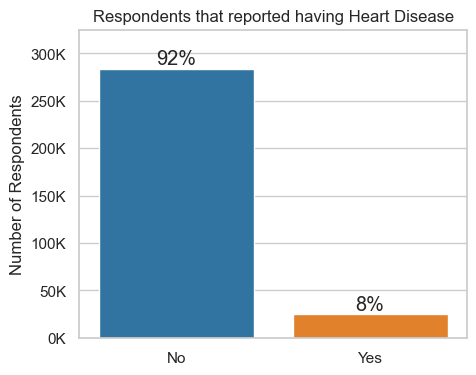

In [10]:
fig, ax = plt.subplots(figsize=(5,4))
ax = sns.countplot(data = df, x= "Heart_Disease")
bar_heights = [p.get_height() for p in ax.patches]
ax.text(0, bar_heights[0], '92%', va ='bottom',ha = 'center', size = 'large')
ax.text(1, bar_heights[1], '8%', va ='bottom', ha = 'center', size = 'large')
ax.set(ylim=(0,325000),
      title = 'Respondents that reported having Heart Disease',
       ylabel = 'Number of Respondents',
      xlabel='')
ax.yaxis.set_major_formatter(lambda x, pos: f'{int(x/1000)}K')
plt.savefig('images/viz_1.jpg', bbox_extra_artists=[ax], bbox_inches='tight')

## Viz 2: Data Understanding Features

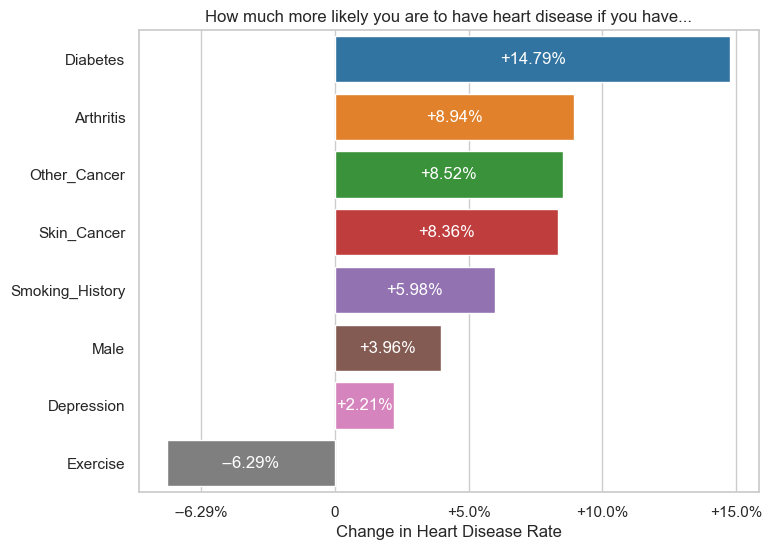

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical = [
    'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes',
    'Arthritis', 'Sex', 'Smoking_History'
]


def viz_2(df):
    """
    This function calculates the rate of each binary variable compared to whether or not the person has a heart condition. It then creates a visual to display the distribution. 
    """
    df2 = df.copy()
    df2.loc[df2['Sex'] == 'Male', "Male"] = "Yes"
    df2.loc[df2['Sex'] == 'Female', "Male"] = "No"
    categories = []
    data1 = []
    data2 = []
    diffs = []

    categorical2 = categorical.copy()
    categorical2.remove('Sex')
    categorical2.append('Male')

    for cat in categorical2:
        num1 = (
            (df2[cat] == 'No') &
            (df2['Heart_Disease'] == 'Yes')).sum() / (df2[cat] == 'No').sum()
        num2 = (
            (df2[cat] == 'Yes') &
            (df2['Heart_Disease'] == 'Yes')).sum() / (df2[cat] == 'Yes').sum()
        categories.append(cat)
        data1.append(round(num1 * 100, 2))
        data2.append(round(num2 * 100, 2))
        diffs.append(round((num2 - num1) * 100, 2))
    df3 = pd.DataFrame({
        'Category': categories,
        'No': data1,
        'Yes': data2,
        'Difference': diffs
    }).sort_values('Difference', ascending=False)

    def number_formatter(num):
        if num > 0:
            return "+" + str(num) + "%"
        elif num < 0:
            return "-" + str(j) + "%"
        else:
            return 0

    fig, ax = plt.subplots(figsize=(8, 6))
    ax = sns.barplot(x="Difference", y="Category", data=df3)
    ax.set(title=
           "How much more likely you are to have heart disease if you have...",
           ylabel='',
           xlabel='Change in Heart Disease Rate')
    for i, j in enumerate(df3['Difference']):
        cords = ax.patches[i].get_center()
        ax.text(cords[0],
                cords[1],
                number_formatter(j),
                va='center',
                ha='center',
                size='medium',
                color="w")

    ax.xaxis.set_major_formatter(lambda x, pos: number_formatter(x))


viz_2(df)

plt.savefig('images/viz_2.jpg', bbox_inches='tight')

## Viz 3: Feature Importance

''

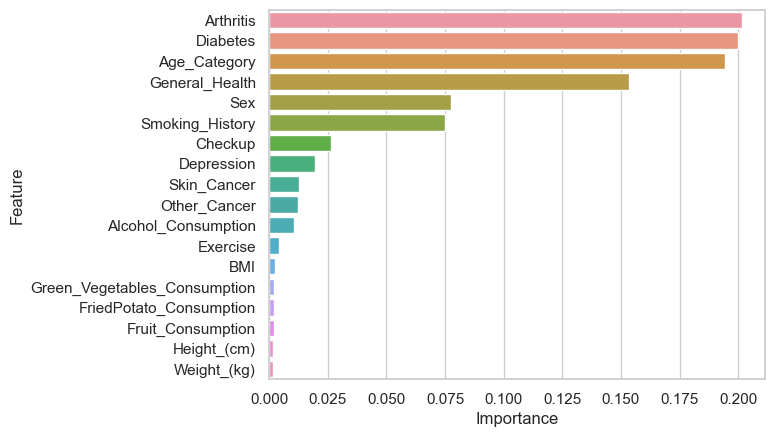

In [14]:
with open('pickles/gs_model.pkl', 'rb') as h:
    gs_model = joblib.load(h)
    
fi = gs_model.named_steps['xbg'].feature_importances_
fn = gs_model[:-1].get_feature_names_out()

df3 = pd.DataFrame({'Feature':fn, 'Importance': fi}).sort_values('Importance', ascending = False)
df3

def clean_features(feature):
    feats = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
    for i in feats:
        if i in feature:
            return i
        else:
            pass
df3['Feature'] = df3['Feature'].apply(clean_features) 

# Combining the features and adding their importance
df4 = df3.groupby('Feature').sum().sort_values('Importance', ascending= False)
df4

fig, ax = plt.subplots()
ax = sns.barplot(x=df4['Importance'], y=df4.index)

;

## Viz 4: Other?

## Viz 5: Other?